In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.datasets import load_diabetes

🔹 Що таке PowerTransformer?

PowerTransformer у sklearn.preprocessing виконує стабілізацію дисперсії та зменшення асиметрії (skewness) шляхом застосування Box-Cox або Yeo-Johnson перетворень.

🔹 Чому він потрібен?

Багато моделей машинного навчання (лінійна регресія, методи, що залежать від евклідової відстані) працюють краще, коли дані мають нормальний розподіл. PowerTransformer допомагає:
- ✅ Зменшити асиметрію (skew())
- ✅ Підтягнути розподіл до нормального
- ✅ Покращити продуктивність моделей

In [5]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

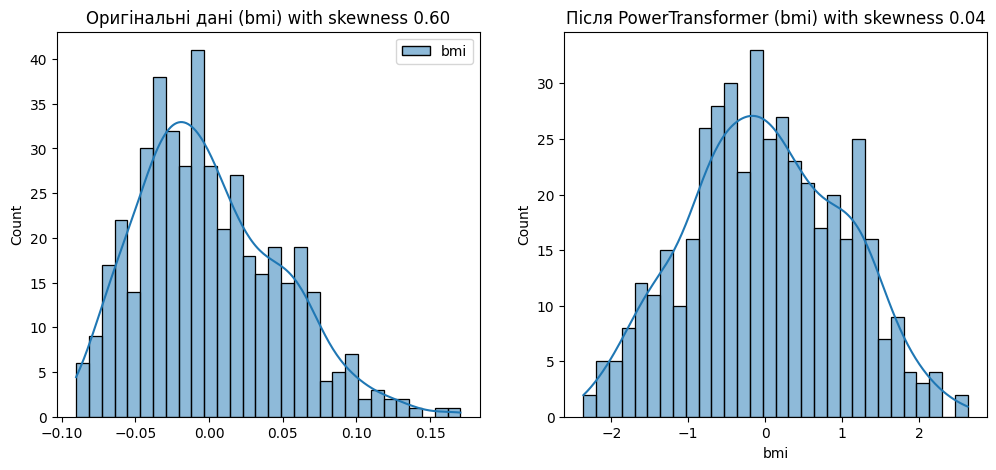

In [17]:
# Обираємо колонку з високою асиметрією
feature = "bmi"
original_data = df[[feature]].copy()

# Виконуємо Power Transformation
pt = PowerTransformer(method="yeo-johnson")
df[feature] = pt.fit_transform(df[[feature]])

# Візуалізація до і після трансформації
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(original_data, bins=30, kde=True, ax=axes[0])
original_skewness = original_data[feature].skew()
axes[0].set_title(f"Оригінальні дані ({feature}) with skewness {original_skewness:.2f}")

sns.histplot(df[feature], bins=30, kde=True, ax=axes[1])
transformed_skewness = df[feature].skew()
axes[1].set_title(f"Після PowerTransformer ({feature}) with skewness {transformed_skewness:.2f}")

plt.show()

# застосування до цільової змінної

In [4]:
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Завантажуємо набір даних
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target  # Додаємо таргет

# Розбиваємо на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["target"]), df["target"], test_size=0.2, random_state=42)

# Трансформуємо таргет
pt = PowerTransformer(method="yeo-johnson")
y_train_transformed = pt.fit_transform(y_train.values.reshape(-1, 1))
y_test_transformed = pt.transform(y_test.values.reshape(-1, 1))

# Навчаємо модель на трансформованому таргеті
model = LinearRegression()
model.fit(X_train, y_train_transformed.ravel())  # `.ravel()`, бо потрібний 1D-масив

# Робимо передбачення (у трансформованому просторі)
y_pred_transformed = model.predict(X_test)

# Виконуємо `inverse_transform()`, щоб повернути у вихідний масштаб
y_pred = pt.inverse_transform(y_pred_transformed.reshape(-1, 1))

results = pd.DataFrame({
    "y_test": y_test.values,
    "y_pred": y_pred.ravel()
})

results.sample(10)

,y_test,y_pred
3904,1.327,1.603705
3471,1.609,1.799420
1520,1.358,1.037165
2475,3.318,4.161694
159,0.957,1.368171
232,1.088,1.391815
2997,0.697,1.244379
1918,2.876,2.434045
3966,1.152,1.986966
1631,1.565,2.006981
